In [1]:
import numpy as np
import scipy.ndimage as nd
import tensorflow as tf
import matplotlib.pyplot as plt

c:\Users\neera\Desktop\Lucid_demo\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\neera\Desktop\Lucid_demo\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\neera\Desktop\Lucid_demo\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\neera\Desktop\Lucid_demo\.venv\lib\site-packages\ten

In [2]:
import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives

import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform


In [3]:
tf.__version__

'1.6.0'

In [4]:
np.__version__

'1.19.5'

In [3]:
model = models.InceptionV1()
model.load_graphdef()

In [4]:
print(model.load_graphdef())

None


------------------------------------------------------------------------
Tensor("Sigmoid:0", shape=(3, 128, 128, 3), dtype=float32)
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
512 3385.3364



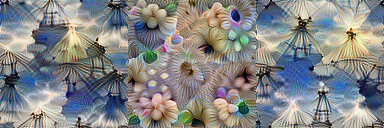

In [5]:
param_f = lambda: param.image(128, batch=3)
obj = objectives.channel("mixed4a_pre_relu", 492, batch=2) - objectives.channel("mixed4a_pre_relu", 507, batch=1) + objectives.channel("mixed4a_pre_relu", 492, batch=0)
_ = render.render_vis(model, obj, param_f)

512 1365.7595


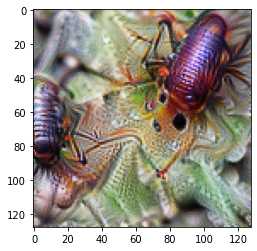

In [18]:
# pre_relu and without pre_relu is giving the same value
# color is less( or smoothed image) if we increase the value of image dimaensions 
# less dimension is more zoomed image. hence pixelated.

# param_f = lambda: param.image(64, batch=None)
# mixed3a_pre_relu have 256 neurons.
# mixed3b_pre_relu have 480 neurons.
# mixed5b_pre_relu have 1024 neurons. mixed5a_pre_relu have 832 neurons and only a,b are there. Most neurons looks polysementic and higher layer have more human redable features.
# Lower levels have shapes as features.

obj = objectives.channel("mixed5a_pre_relu", 800)
out_img = render.render_vis(model, obj) #thresholds=(1, 32, 128, 256, 512, 1024)


plt.imshow(out_img[0].squeeze())

In [25]:
ls_4b = []
for i in range(210,240):
    obj = objectives.channel("mixed4b_pre_relu", i)
    temp = render.render_vis(model, obj)
    ls_4b.append(temp)

512 1251.8461
512 1010.6168
512 1193.8074
512 992.26215
512 828.24634
512 752.5233
512 1125.0889
512 1508.4202
512 844.3198
512 1100.7932
512 590.01056
512 1203.8636
512 1642.8436
512 918.46204
512 913.17633
512 1267.3933
512 1025.2948
512 972.9052
512 1505.8218
512 757.9818
512 966.75104
512 1172.5461
512 1188.6633
512 1789.3918
512 1080.7013
512 1045.903
512 305.77985
512 1153.2844
512 967.0705
512 1880.231


In [26]:
import os
import cv2 as cv

dump_dir = r"C:\Users\neera\Desktop\Lucid_demo\New folder\4b_210to240"
os.makedirs(dump_dir, exist_ok=True)

for i in range(len(ls_4b)):
    dump_img = np.array(ls_4b[i]).squeeze()

    if dump_img.dtype != np.uint8:
        dump_img = (dump_img*255).astype(np.uint8)

    dump_img_name = str(i+210) + '.jpg'

    # Step 3: write image to the file system
    # ::-1 because opencv expects BGR (and not RGB) format...
    dump_path = os.path.join(dump_dir, dump_img_name)
    cv.imwrite(dump_path, dump_img[:, :, ::-1])

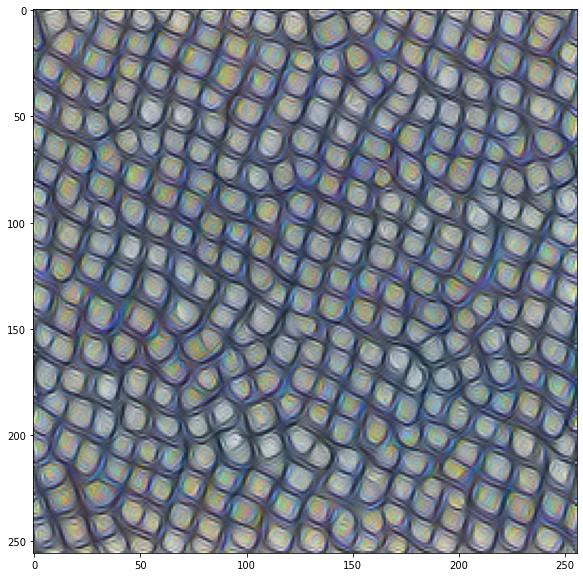

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(out_img[0].squeeze())

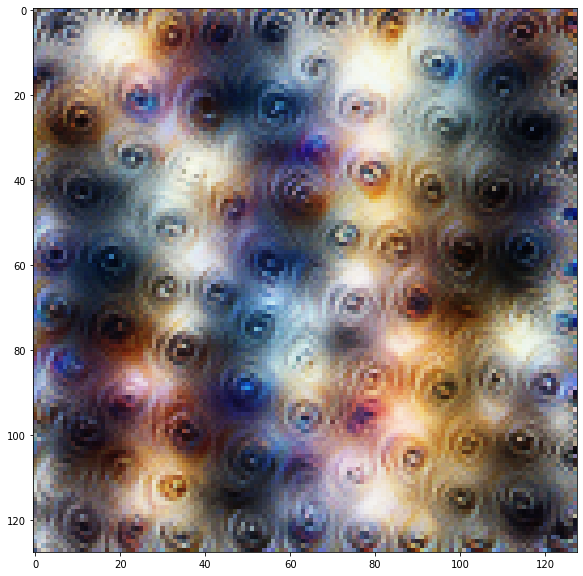

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(out_img[0].squeeze())

------------------------------------------------------------------------
Tensor("Sigmoid:0", shape=(1, 128, 128, 3), dtype=float32)
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
512
------------------------------------------------------------------------
------------------------------------------------------------------------
<class 'list'>
------------------------------------------------------------------------
512 1544.1865



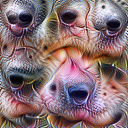

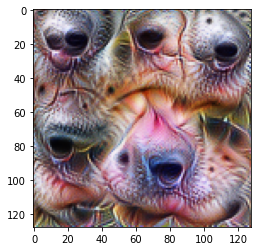

In [15]:
out_img = render.render_vis(model, "mixed4b_pre_relu:409")

plt.imshow(out_img[0].squeeze())

------------------------------------------------------------------------
Tensor("Sigmoid:0", shape=(1, 128, 128, 3), dtype=float32)
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
512
------------------------------------------------------------------------
------------------------------------------------------------------------
<class 'list'>
------------------------------------------------------------------------
512 585.1495



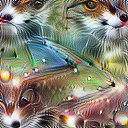

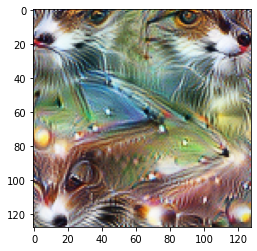

In [16]:
out_img = render.render_vis(model, "mixed4e_pre_relu:55")

plt.imshow(out_img[0].squeeze())